# Getting started with McChesney dataset

In this example, we will show examples of the main functionalities included in the emtk.

This includes:
- Parsing raw data from the EMIP dataset to pandas dataframe.
- Visualizing raw data, filtered fixation, saccades, and AOIs visualization.
- Applying fixation correction through setting offset.
- Generating AOIs for any EMIP stimuli.
- Adding text tokens to generated AOIs.
- Adding srcML tags to AOIs and tokens.
- Performing hit test between fixations and AOIs.

In [1]:
%load_ext autoreload
%autoreload 2

# Importing the tool

In [2]:
from emtk import parsers, visualization, util, aoi

# Parsing raw data from the McChesney dataset

In [3]:
eye_events, samples = parsers.McChesney(sample_size = 3)

C:\Users\hoang\AppData\Local\Temp/ipykernel_3976/1076333612.py:1: DtypeWarning: Columns (4,5,38) have mixed types.Specify dtype option on import or set low_memory=False.
  eye_events, samples = parsers.McChesney(sample_size = 3)


In [4]:
samples.head()

,eye_tracker,experiment_id,participant_id,filename,trial_id,stimuli_module,stimuli_name,Recording timestamp [ms],Gaze point X [DACS px],Gaze point Y [DACS px],...,Presented Media name,Presented Media width [px],Presented Media height [px],Presented Media position X [DACS px],Presented Media position Y [DACS px],Original Media width [px],Original Media height [px],Eye movement type,Gaze event duration [ms],Eye movement type index
0,Tobii X3-120,P100,P100,P100.tsv,1,emtk/datasets/McChesney2021/stimuli,01_P1Sa.png,105843,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fixation,200.0,312.0
1,Tobii X3-120,P100,P100,P100.tsv,1,emtk/datasets/McChesney2021/stimuli,01_P1Sa.png,105850,1036.0,240.0,...,P1Sa.JPG,1920.0,1080.0,0.0,0.0,1280.0,720.0,Fixation,200.0,312.0
2,Tobii X3-120,P100,P100,P100.tsv,1,emtk/datasets/McChesney2021/stimuli,01_P1Sa.png,105858,1045.0,233.0,...,P1Sa.JPG,1920.0,1080.0,0.0,0.0,1280.0,720.0,Fixation,200.0,312.0
3,Tobii X3-120,P100,P100,P100.tsv,1,emtk/datasets/McChesney2021/stimuli,01_P1Sa.png,105867,1039.0,226.0,...,P1Sa.JPG,1920.0,1080.0,0.0,0.0,1280.0,720.0,Fixation,200.0,312.0
4,Tobii X3-120,P100,P100,P100.tsv,1,emtk/datasets/McChesney2021/stimuli,01_P1Sa.png,105875,1040.0,229.0,...,P1Sa.JPG,1920.0,1080.0,0.0,0.0,1280.0,720.0,Fixation,200.0,312.0


In [5]:
eye_events.head()

,eye_tracker,experiment_id,participant_id,filename,trial_id,stimuli_module,stimuli_name,timestamp,duration,x0,y0,x1,y1,token,pupil,amplitude,peak_velocity,eye_event_type
0,Tobii X3-120,P100,P100,P100.tsv,1,emtk/datasets/McChesney2021/stimuli,01_P1Sa.png,105843,200.0,NaN,NaN,NaN,NaN,None,0,NaN,NaN,fixation
1,Tobii X3-120,P100,P100,P100.tsv,1,emtk/datasets/McChesney2021/stimuli,01_P1Sa.png,105850,200.0,1036.0,240.0,NaN,NaN,None,0,NaN,NaN,fixation
2,Tobii X3-120,P100,P100,P100.tsv,1,emtk/datasets/McChesney2021/stimuli,01_P1Sa.png,105858,200.0,1045.0,233.0,NaN,NaN,None,0,NaN,NaN,fixation
3,Tobii X3-120,P100,P100,P100.tsv,1,emtk/datasets/McChesney2021/stimuli,01_P1Sa.png,105867,200.0,1039.0,226.0,NaN,NaN,None,0,NaN,NaN,fixation
4,Tobii X3-120,P100,P100,P100.tsv,1,emtk/datasets/McChesney2021/stimuli,01_P1Sa.png,105875,200.0,1040.0,229.0,NaN,NaN,None,0,NaN,NaN,fixation


# Visualization

In [6]:
experiment_id = 'P131'
trial_id = '2'

## Raw data (samples), filtered fixations, saccades, and aoi

You can visualize any trial raw data, filtered fixations, or a combination of the two. The fixation is yellow, and the samples are red.

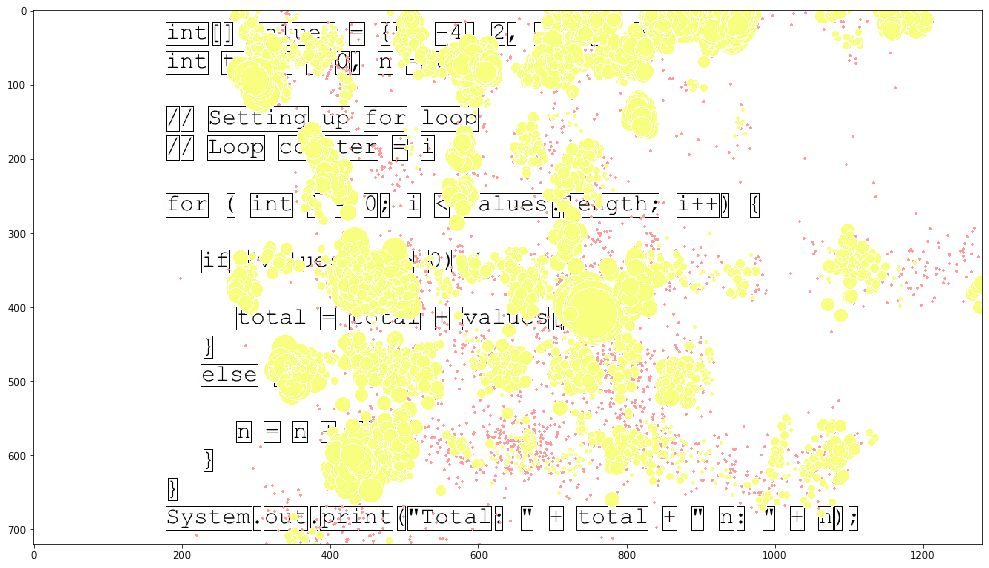

In [7]:
trial_data = eye_events.loc[(eye_events['experiment_id'] == experiment_id) & 
                            (eye_events['trial_id'] == trial_id)]

samples_data = samples.loc[(samples['experiment_id'] == experiment_id) & 
                            (samples['trial_id'] == trial_id)]
 
visualization.draw_trial(trial_data, samples_data, draw_raw_data = True, draw_fixation=True,
                        draw_aoi=True, sample_x_col="Gaze point X [DACS px]", 
                        sample_y_col="Gaze point Y [DACS px]")

## Heatmap - Areas of dense fixation

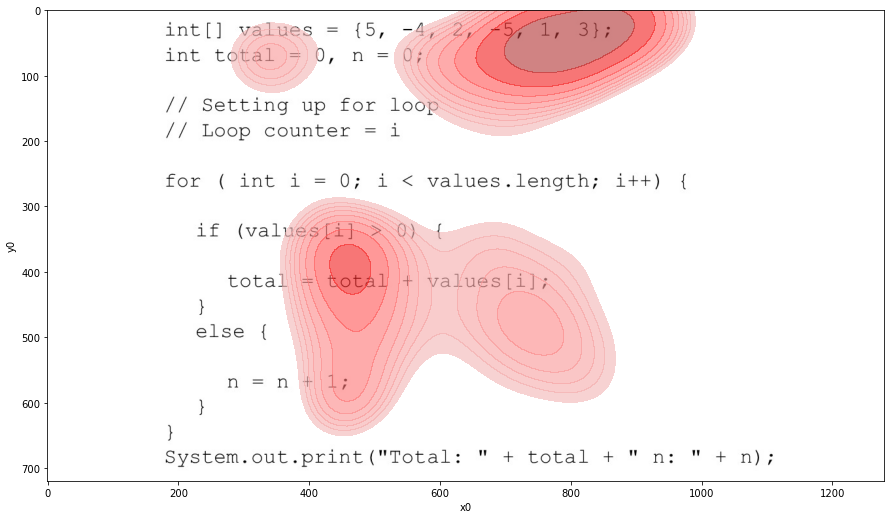

In [8]:
visualization.heatmap(trial_data)

## Duration of fixation on each line

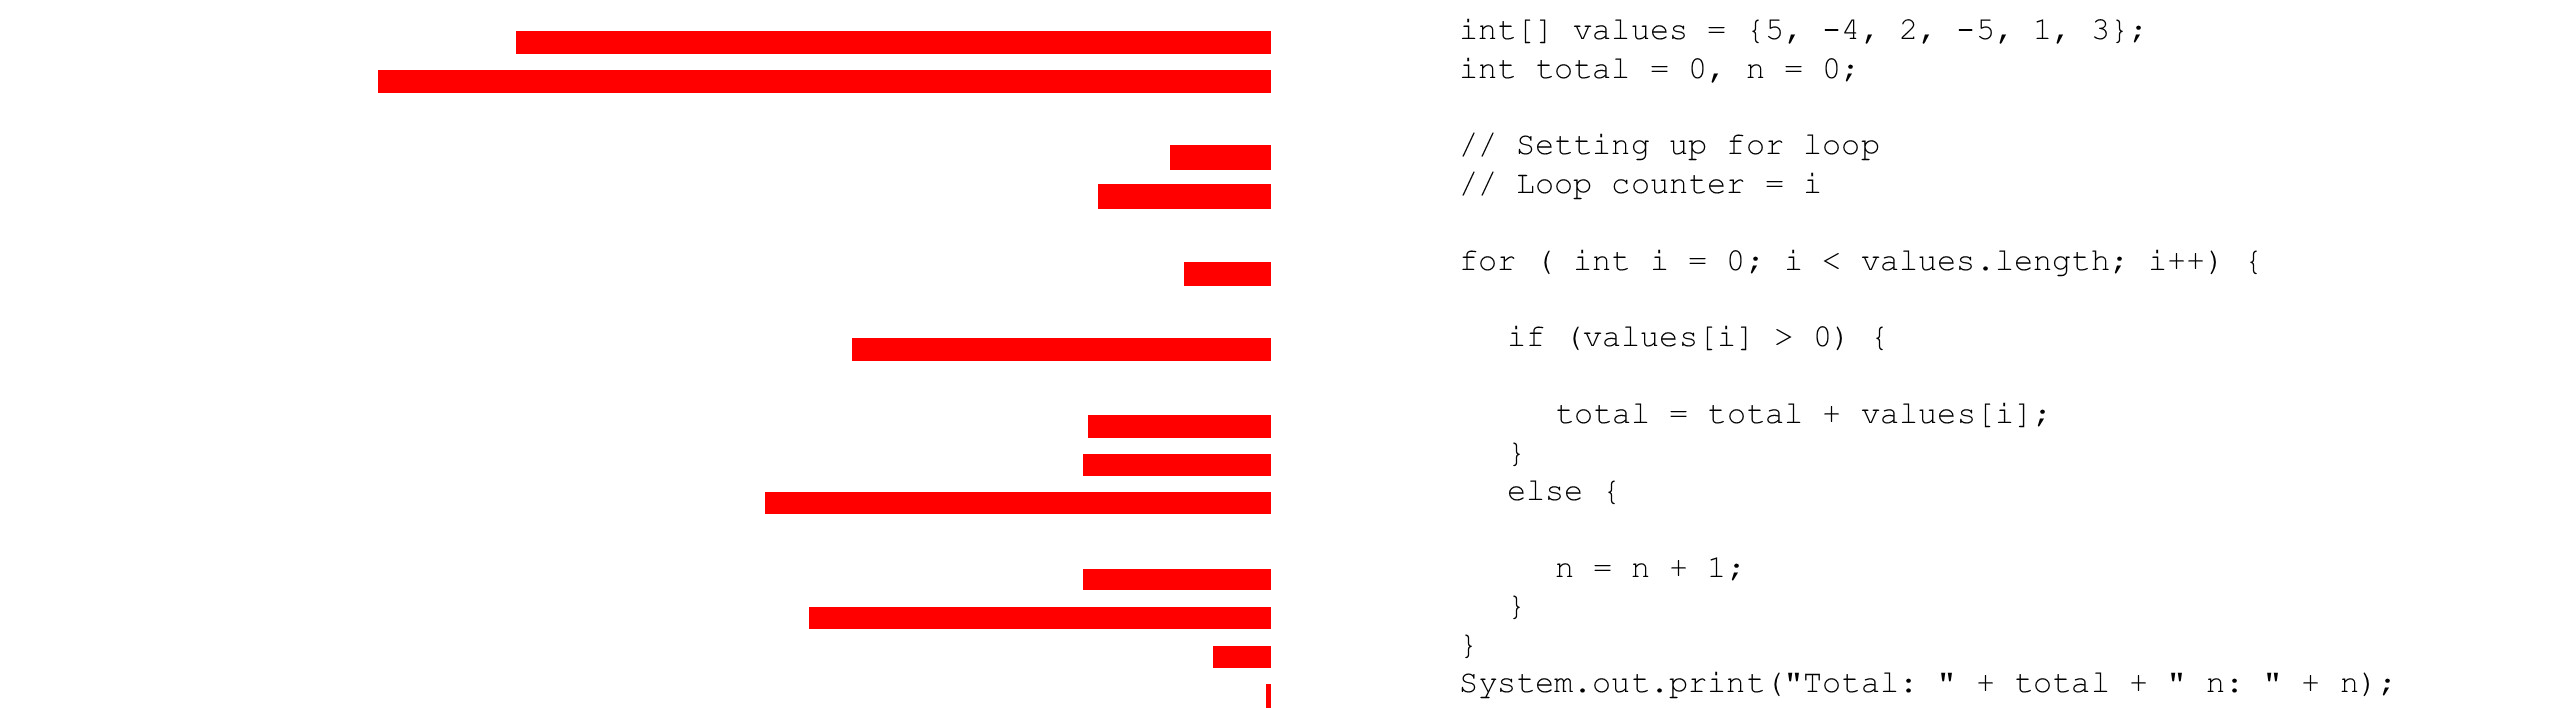

In [9]:
visualization.fixation_duration(trial_data, unit_height = .01)

## Eye movement across lines through time

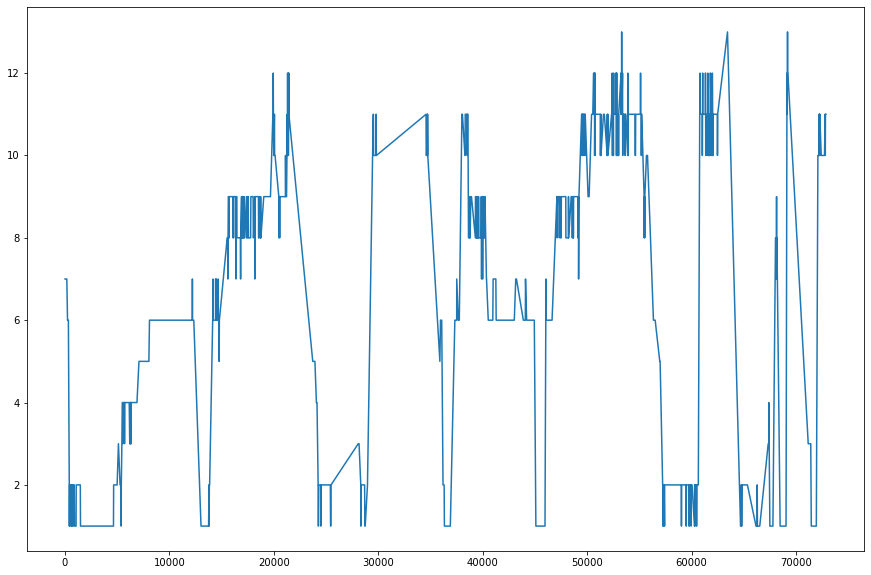

In [10]:
visualization.fixation_timeline(trial_data)

# Fixation correction through setting offset

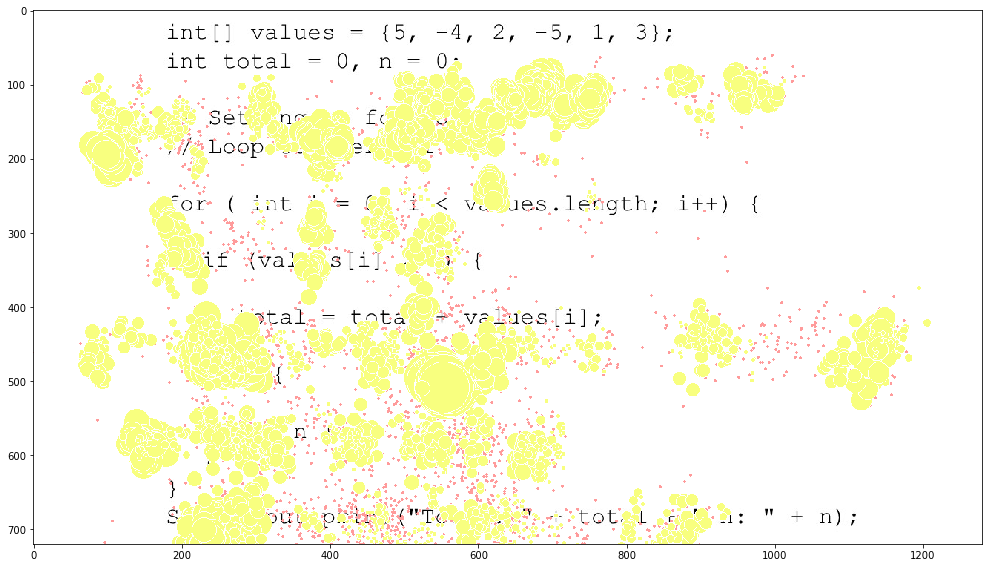

In [11]:
trial_data_copy = util.sample_offset(trial_data, -200, 100)
samples_copy = util.sample_offset(samples_data, -200, 100, 
                                  x0_col='Gaze point X [DACS px]', 
                                  y0_col='Gaze point Y [DACS px]')
visualization.draw_trial(trial_data_copy, samples_copy, draw_raw_data = True, 
                         sample_x_col="Gaze point X [DACS px]", sample_y_col="Gaze point Y [DACS px]")

# Generate AOIs for a stimuli

You can generate token level or line level AOIs for any stimuli.

In [12]:
aoi_df = aoi.find_aoi(trial_data)
aoi_df.head()

,kind,name,x,y,width,height,image
0,sub-line,line 1 part 1,179.5,16,58,32,02_P2Sa.png
1,sub-line,line 1 part 2,242.5,16,11,32,02_P2Sa.png
2,sub-line,line 1 part 3,257.5,16,13,32,02_P2Sa.png
3,sub-line,line 1 part 4,291.5,16,117,32,02_P2Sa.png
4,sub-line,line 1 part 5,426.5,16,22,32,02_P2Sa.png


# Perform hit test between fixation and AOIs

Match fixations to AOIs to calculate the fixation duration over each AOI (can be customized for line or code token). Radius is 25 pixels by default and it represents the area around the AOI included in the AOI region.

In [13]:
aoi_fixations = aoi.hit_test(trial_data, aoi_df, radius = 25)
aoi_fixations.head()

,eye_tracker,experiment_id,participant_id,filename,trial_id,stimuli_module,stimuli_name,timestamp,duration,x0,y0,aoi_kind,aoi_name,aoi_x,aoi_y,aoi_width,aoi_height
0,Tobii X3-120,P131,P131,P131.tsv,2,emtk/datasets/McChesney2021/stimuli,02_P2Sa.png,228078,692.0,752.0,395.0,sub-line,line 7 part 9,755.5,400,13,32
1,Tobii X3-120,P131,P131,P131.tsv,2,emtk/datasets/McChesney2021/stimuli,02_P2Sa.png,228086,692.0,752.0,403.0,sub-line,line 7 part 9,755.5,400,13,32
2,Tobii X3-120,P131,P131,P131.tsv,2,emtk/datasets/McChesney2021/stimuli,02_P2Sa.png,228095,692.0,754.0,407.0,sub-line,line 7 part 9,755.5,400,13,32
3,Tobii X3-120,P131,P131,P131.tsv,2,emtk/datasets/McChesney2021/stimuli,02_P2Sa.png,228103,692.0,752.0,414.0,sub-line,line 7 part 9,755.5,400,13,32
4,Tobii X3-120,P131,P131,P131.tsv,2,emtk/datasets/McChesney2021/stimuli,02_P2Sa.png,228111,692.0,760.0,400.0,sub-line,line 7 part 9,755.5,400,13,32
